In [20]:
from scipy import sparse
import event_detection as ed

In [21]:
fileName = 'events_corpus.csv'

### Get Preprocessed Data

In [22]:
x, y, timestamp = ed.pre(fileName)

               text  timestamp
event                         
fifa_final     1000       1000
no_event       2990       2990
super_tuesday  1000       1000
us_elections   1000       1000


### Term Frequency Vectorizer

In [23]:
X_vec = ed.tfidfVectorizer(x)

### Label Encoder

In [24]:
y_encoded, labelEncoder = ed.labelEncoding(y)

### Split test and train data

In [25]:
X_train, X_test, y_train, y_test = ed.splitTestTrain(X_vec, y_encoded)

### Start Training

In [26]:
naiveBayesPrecision, naiveBayesRecall, naiveBayesFMeasure, naiveBayesAcc, nbClassifier = ed.applyNaiveBayesClassifier(X_train, y_train, X_test, y_test)
svmPrecision, svmRecall, svmFMeasure, svmAcc, svcClassifier = ed.applySVMClassifier(X_train, y_train, X_test, y_test)
randomForestPrecision, randomForestRecall, randomForestFMeasure, randomForestAcc, rfClassifier = ed.applyRandomForestClassifier(X_train, y_train, X_test, y_test)
nnPrecision, nnRecall, nnFMeasure, nnAcc, nnClassifier = ed.applyNeuralNetworkClassifier(X_train, y_train, X_test, y_test)

Multinomial Naive Bayes Classifier Test Accuracy:  65.31255796698201
Multinomial Naive Bayes Classifier Test Precision:  89.51947142704319
Multinomial Naive Bayes Classifier Test Recall:  48.13441118229217
Multinomial Naive Bayes Classifier Test F measure:  62.60581924477484


SVCs Test Accuracy:  79.61417176776109
SVCs Test Precision:  90.42819000246544
SVCs Test Recall:  69.79381334652665
SVCs Test F measure:  78.78229060148651


Random Forest's Test Accuracy:  84.69671675013912
Random Forest's Test Precision:  90.64000552730182
Random Forest's Test Recall:  77.38509750601996
Random Forest's Test F measure:  83.48973503423981


Neural Network Classifier Test Accuracy:  74.06789092932665
Neural Network Classifier Test Precision:  65.02819212487654
Neural Network Classifier Test Recall:  63.877279434787305
Neural Network Classifier Test F measure:  64.44759790630265


In [27]:
X_test.shape

(5391, 13502)

In [29]:
start_index = 0
end_index = 5
output = rfClassifier.predict(X_vec[start_index:end_index])
predLabels = labelEncoder.inverse_transform(output)
origLabels = y[start_index:end_index]
# originalText = x[start_index:end_index]

print('Predicted Labels:')
print(predLabels)

print('Original Labels:')
print(origLabels)

Predicted Labels:
['fifa_final' 'fifa_final' 'fifa_final' 'fifa_final' 'no_event']
Original Labels:
0    fifa_final
1    fifa_final
2    fifa_final
3    fifa_final
4    fifa_final
Name: event, dtype: object


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


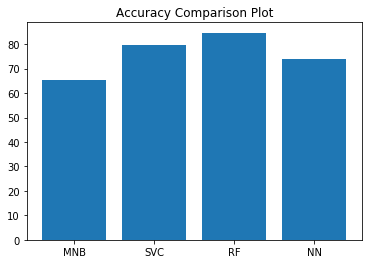

In [30]:
ed.plotAcuuracyComparisonGraph(naiveBayesAcc, svmAcc, randomForestAcc, nnAcc)

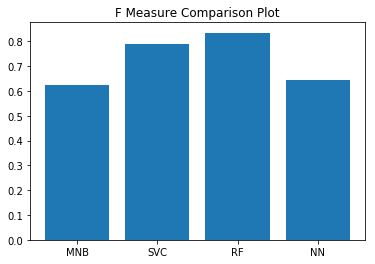

In [31]:
ed.plotFmeasureComparisonGraph(naiveBayesFMeasure, svmFMeasure, randomForestFMeasure, nnFMeasure)